# PANDAS

### Overview

### Introduction to Data Structure

In [1]:
# To get started, we have to import numpy and pandas

import numpy as np
import pandas as pd


pd.set_option("compute.use_bottleneck", True)
pd.set_option("compute.use_numexpr", True)

In [2]:
'''
  Here is a basic tenet to keep in mind: data alignment is intrinsic.
The link between labels and data will not be broken unless done so explicitly 
by you

'''

# We have two data structures in pandas: Series and DataFrame


'\n  Here is a basic tenet to keep in mind: data alignment is intrinsic.\nThe link between labels and data will not be broken unless done so explicitly \nby you\n\n'

### Pandas Series

In [3]:
# Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

# syntax = pd.Series(data, index=index)

'''
Here, data can be many different things:
    • an ndarray
    • a Python dict
    • a scalar value (like 5)
    
The passed index is a list of axis labels.
Thus, this separates into a few cases depending on what data is:
    if data is an ndarray, index must be the same length as data. If no index is passed, one will be created having values [0, ..., len(data) - 1].
'''
############## NDARRAY ##########
data  = np.array([1,2,3,4,5])
index = ['a', 'b', 'c', 'd', 'e']

series = pd.Series(data)
print(series)
series1 = pd.Series(data, index=index)
print(series1)

#Please check the indexes at series and series1


0    1
1    2
2    3
3    4
4    5
dtype: int32
a    1
b    2
c    3
d    4
e    5
dtype: int32


In [4]:
'''
Note: pandas supports non-unique index values. If an operation that does not support duplicate index values is
attempted, an exception will be raised at that time. The reason for being lazy is nearly all performance-based (there
are many instances in computations, like parts of GroupBy, where the index is not used).

'''
index = ['a', 'b', 'b', 'c', 'd']
pd.Series(data, index) #It does support non-unique index values

a    1
b    2
b    3
c    4
d    5
dtype: int32

In [17]:
# If you wanna create series from a dict ==>

'''
Take Note
With Python version >= 3.6 and pandas version >= 0.23:
   Series index ==> dicts keys in an ordered manner
else:
    Series Index ==> index will be the lexically ordered list of dict keys.
    
In the example above, if you were on a Python version lower than 3.6 or a pandas version lower than 0.23, the Series
would be ordered by the lexical order of the dict keys (i.e. ['a', 'b', 'c'] rather than ['b', 'a', 'c']).


'''
############## PYTHON DICT #########
# Take a look at this example
data = {
    'a': 34,
    'b': 40, 
    'c': 46,
    'd': 52,
    'f': 46
}
a  = pd.Series(data)
print(a)

# We can modify our arrangement

b = pd.Series(data, index=['b', 'e', 'c', 'a', 'd'])
print(b)
#Take note of index 'e'. It gives NaN
# NaN refers to as missing values

a    34
b    40
c    46
d    52
f    46
dtype: int64
b    40.0
e     NaN
c    46.0
a    34.0
d    52.0
dtype: float64


In [7]:
############ SCALAR ##########

data = 5
index =  ['a', 'b', 'b', 'c', 'd']

pd.Series(data, index)
# Take a look at the duplication

a    5
b    5
b    5
c    5
d    5
dtype: int64

#### Series as an ndarray

In [26]:
'''
Series acts very similarly to a ndarray, and is a valid argument to most 
NumPy functions. However, operations
such as slicing will also slice the index.

'''
print(a[1])
a[1:4]
print(a[a<a.mean()])

# take note pd.Series().mean() or other measure of central tendency

a[[2,4,1]]

40
a    34
b    40
dtype: int64


c    46
f    46
b    40
dtype: int64

In [31]:
# Like a NumPy array, a pandas Series has a dtype.
print(a.dtype)

#If you need the actual array backing a Series, use Series.array
print(a.array)

#While Series is ndarray-like, if you need an actual ndarray, then use Series.to_numpy()
(a.to_numpy())

int64
<PandasArray>
[34, 40, 46, 52, 46]
Length: 5, dtype: int64


array([34, 40, 46, 52, 46], dtype=int64)

#### Series as a dict

In [40]:
print(a)

# You can access a value by its index
print(a['f'])
print('g' in a) # Returns a boolean False since 'g' is not present.

#A KeyError exception is raised here because 'g' is not found
try:
    a['g']
except:
    print('Not Found')
# To prevent this, we can use get

a.get('g', np.nan)

a    34
b    40
c    46
d    52
f    46
dtype: int64
46
False
Not Found


nan

#### Vectorized operations and label alignment with Series

In [43]:
print(a + a)
print(a*4)

a     68
b     80
c     92
d    104
f     92
dtype: int64
a    136
b    160
c    184
d    208
f    184
dtype: int64


In [51]:
'''
A key difference between Series and ndarray is that operations between Series automatically align the data based on
label. Thus, you can write computations without giving consideration to whether the Series involved have the same
labels.

The result of an operation between unaligned Series will have the union of the indexes involved. If a label is not found
in one Series or the other, the result will be marked as missing NaN. Being able to write code without doing any explicit
data alignment grants immense freedom and flexibility in interactive data analysis and research. The integrated data
alignment features of the pandas data structures set pandas apart from the majority of related tools for working with
labeled data.

Having an index label, though the data is missing, is
typically important information as part of a computation. You of course have the option of dropping labels with
missing data via the dropna function.


'''
print(a[:-1])
print(a[1:])
print((a[:-1] + a[1:]).dropna())

#Take note of a and f. We don't have them in both. Pandas Series automatically works things out based on the index.

a    34
b    40
c    46
d    52
dtype: int64
b    40
c    46
d    52
f    46
dtype: int64
b     80.0
c     92.0
d    104.0
dtype: float64


#### Name Attribute

In [55]:
# Series can also have a name attribute

#The Series name will be assigned automatically in many cases, in particular when taking 1D slices of DataFrame as you will see below.

name = pd.Series(np.array([1,2,3,4,5]), name='myArray')
print(name[name<name.median()])
name.name

# You can rename a Series with the pandas.Series.rename() method.
new_name = name.rename('myNewArray')
new_name.name

# Take note that I reassigned it to another thing

0    1
1    2
Name: myArray, dtype: int32


'myNewArray'

## DataFrame

In [72]:
'''

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. 
You can think of it like:

      a spreadsheet or 
      SQL table, or 
      a dict of Series objects.
      
      
It is generally the most commonly used pandas object.

Like Series, DataFrame accepts many different kinds of input:

     • Dict of 1D ndarrays, lists, dicts, or Series
     • 2-D numpy.ndarray ==> not 1D
     • Structured or record ndarray
     • A Series
     • Another DataFrame


   Along with the data, you can optionally pass argument
        index ==> (row labels) and 
        columns ==> (column labels). 
   
   If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. 
   
   Note: A dict of Series plus a specific index will discard all data not matching up to the passed index.
   
   If axis labels are not passed, they will be constructed from the input data based on common sense rules.
   
   Note: When the data is a dict, and columns is not specified, the DataFrame columns will be ordered by the dict’s
   insertion order, if you are using Python version >= 3.6 and pandas >= 0.23.
'''

#From dict of Series or dicts


data = {
    'one': pd.Series(np.array([1,2,3,4,5]), index=['a', 'b', 'c', 'd', 'e']),
    'two': pd.Series(np.linspace(0,10,5), index= ['a', 'b', 'd', 'c', 'e']),
    'three': pd.Series(np.arange(2,12,2), index=['c', 'a', 'b', 'd', 'e']),
    
}

print(pd.DataFrame(data))
dat = pd.DataFrame(data, index=['b', 'a', 'e', 'b'], columns=['two', 'three', 'one'])
print(pd.DataFrame(data, index=['b', 'a', 'e', 'b'], columns=['two', 'three', 'one']))

# Note: index ==> (row labels) and columns ==> (column labels).


   one   two  three
a    1   0.0      4
b    2   2.5      6
c    3   7.5      2
d    4   5.0      8
e    5  10.0     10
    two  three  one
b   2.5      6    2
a   0.0      4    1
e  10.0     10    5
b   2.5      6    2


In [70]:
# The row and column labels can be accessed respectively by accessing the index and columns attributes
print(dat.columns)
dat.index

Index(['two', 'three', 'one'], dtype='object')


Index(['b', 'a', 'e', 'b'], dtype='object')

In [87]:
# From dict of ndarrays / lists

'''
The ndarrays must all be the same length. 
If an index is passed, it must clearly also be the same length as the arrays.
If no index is passed, the result will be range(n), where n is the array length.
'''

arr = np.array([[[1,2,3,4,5],[6,7,8,9,0]],[[4,5,6,7,8],[9,0,1,2,3]], [[2,3,4,5,6], [7,8,9,0,1]]])
print(arr.shape)
try:
    p = pd.DataFrame(arr) # Returns error ==> Must pass 2-d input. shape=(3, 2, 5)
except:
    print('Pandas does not allow 3D')

p = pd.DataFrame(arr.reshape(6,5))
print(p)

new_arr1 = np.array([4,5,6,7,8])
new_arr2  = np.array([7,8,9,0,1])

# Dictionary should not allow 2D array in it. Numpy sees it as a scalar
print(new_arr1)
data = {
    'one': new_arr1,
    'two': new_arr2,
}

pd.DataFrame(data, index=['z', 'a', 'b', 'c', 'd'])

(3, 2, 5)
Pandas does not allow 3D
   0  1  2  3  4
0  1  2  3  4  5
1  6  7  8  9  0
2  4  5  6  7  8
3  9  0  1  2  3
4  2  3  4  5  6
5  7  8  9  0  1
[4 5 6 7 8]


,one,two
z,4,7
a,5,8
b,6,9
c,7,0
d,8,1


In [94]:
# Note: DataFrame is not intended to work exactly like a 2-dimensional NumPy ndarray.

# From a list of dicts
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}, {'a':2, 'b':5}]

def Pand(lis, index=None, columns=None):
    return pd.DataFrame(lis, index=index, columns=columns)

p = Pand(data2)
p.dropna() #dropna function removes all the rows with NaN

,a,b,c
1,5,10,20.0


In [95]:
#You could create a dataframe from a pandas Series. The result will be a DataFrame with the same index as the input Series,
#and with one column whose name is the original name of the Series (only if no other column name provided).



In [103]:
# From a list of namedtuples

'''
  The field names of the first namedtuple in the list determine the columns of the DataFrame. 
The remaining namedtuples (or tuples) are simply unpacked and their values are fed into the rows of the DataFrame. 
If any of those tuples is shorter than the first namedtuple then the later columns in the corresponding row are marked as 
missing values. If any are longer than the first namedtuple, a ValueError is raised.
'''

from collections import namedtuple
Point = namedtuple("Point", "x y")
a = pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])
print(a)
b_point = namedtuple('Point', 'z a b')
b = pd.DataFrame([b_point(1,2,3), b_point(4,5,6), b_point(7,8,9)])
b

   x  y
0  0  0
1  0  3
2  2  3


,z,a,b
0,1,2,3
1,4,5,6
2,7,8,9


#### Column selection, addition, deletion

In [116]:
# You can treat a DataFrame semantically like a dict of like-indexed Series objects. 
# Getting, setting, and deleting columns works with the same syntax as the analogous dict operations

datar = (pd.DataFrame(data))
print(datar['one'])

datar['three'] = datar['one'] + datar['two']
datar['four'] = datar['three'] < datar['three'].median()
datar

0    4
1    5
2    6
3    7
4    8
Name: one, dtype: int32


,one,two,three,four
0,4,7,11,False
1,5,8,13,False
2,6,9,15,False
3,7,0,7,True
4,8,1,9,True


In [112]:
# Columns can be deleted or popped like with a dict:

del datar['two']

In [113]:
datar

,one,three,four
0,4,11,False
1,5,13,False
2,6,15,False
3,7,7,True
4,8,9,True


In [117]:
# When inserting a scalar value, it will naturally be propagated to fill the column

datar['five'] = 'Olusols'
datar

,one,two,three,four,five
0,4,7,11,False,Olusols
1,5,8,13,False,Olusols
2,6,9,15,False,Olusols
3,7,0,7,True,Olusols
4,8,1,9,True,Olusols


In [140]:
# When inserting a Series that does not have the same index as the DataFrame, it will be conformed to the DataFrame’s index

datar['six'] = datar['one'][:2]
datar['seven'] = datar['four'][datar['four'] != True] # datar['four'][any condition that works]
datar # datar['seven'] does conform to the DataFrame index. No index is specified for it.

,one,two,three,four,five,six,seven
0,4,7,11,False,Olusols,4.0,False
1,5,8,13,False,Olusols,5.0,False
2,6,9,15,False,Olusols,NaN,False
3,7,0,7,True,Olusols,NaN,NaN
4,8,1,9,True,Olusols,NaN,NaN


In [1]:
import pandas as pd
data = pd.read_csv('student.csv')
data['new'] = data['jamb']
print(data)

'''
Inspired by dplyr’s mutate verb, DataFrame has an assign() method that allows you to easily create new columns
that are potentially derived from existing columns.

'''
new_data = data.assign(agg = data['aggregate']/2)
new_data

    jamb  putme  aggregate  new
0    303     78     76.875  303
1    330     84     83.250  330
2    320     78     79.250  320
3    298     76     75.250  298
4    304     77     76.500  304
5    312     80     79.000  312
6    340     88     86.500  340
7    330     86     84.250  330
8    288     75     73.500  288
9    295     82     77.875  295
10   270     72     69.750  270
11   266     67     66.750  266
12   240     64     62.000  240
13   276     68     68.500  276
14   306     82     79.250  306


,jamb,putme,aggregate,new,agg
0,303,78,76.875,303,38.4375
1,330,84,83.250,330,41.6250
2,320,78,79.250,320,39.6250
3,298,76,75.250,298,37.6250
4,304,77,76.500,304,38.2500
5,312,80,79.000,312,39.5000
6,340,88,86.500,340,43.2500
7,330,86,84.250,330,42.1250
8,288,75,73.500,288,36.7500
9,295,82,77.875,295,38.9375


In [7]:
# We can also pass in a function of one argument to be evaluated on the DataFrame being assigned to.




data.assign(result_ratio = lambda x: (x['jamb']/x['putme']))
#I justhave to understand this better
# assign always returns a copy of the data, leaving the original DataFrame untouched.

,jamb,putme,aggregate,new,result_ratio
0,303,78,76.875,303,3.884615
1,330,84,83.250,330,3.928571
2,320,78,79.250,320,4.102564
3,298,76,75.250,298,3.921053
4,304,77,76.500,304,3.948052
5,312,80,79.000,312,3.900000
6,340,88,86.500,340,3.863636
7,330,86,84.250,330,3.837209
8,288,75,73.500,288,3.840000
9,295,82,77.875,295,3.597561


<AxesSubplot:xlabel='jamb', ylabel='putme'>

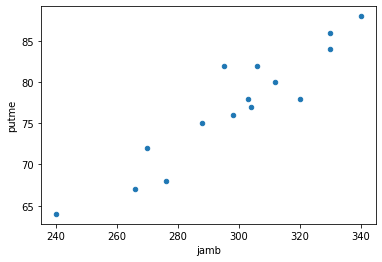

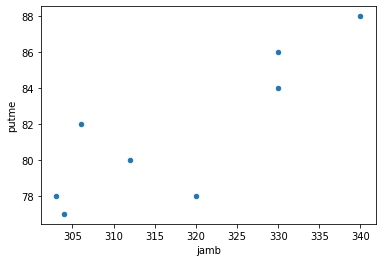

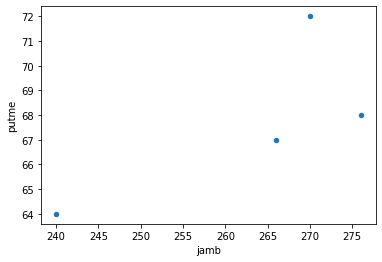

In [18]:
data.plot(kind='scatter', x='jamb', y='putme') #Wait, Let's try something out

data.query('jamb > 300').query('putme > 75').plot(kind='scatter', x='jamb', y='putme')

data.query('jamb < 300').query('putme < 75').plot(kind='scatter', x='jamb', y='putme')

### Indexing / selection

In [47]:
# Let's use data
print(data)

# Let's select column ==> df[col]
data['jamb'] # We select the JAMB column data

# Let's select multiple colums
#Let's say we have a list of column
column = ['jamb', 'aggregate']
print(data[column])

# What if we use df[col1:col2], will it work. Let's see
'''try:
    print(data[['jamb': 'aggregate']])
    
except:
    print('It returns error. Ah!')'''
    
# Wow, error is not cached

#Select row by label(index) ==> df.loc[label/index] # don't forget that index is the same as row
# Row selection, for example, returns a Series whose index is the columns of the DataFrame:


data.loc[0] # row 1 data

# Let's select multiple rows ==> slicing
data.loc[0:4] # Take note it ends at 4 not 3

# Select row by integer location 

print(data.iloc[5])
data.loc[5] # What then is the difference

# You use integer with iloc and index with loc. For example

some_data1 = [1,2,3,4,5]
some_data2 = [6,7,8,9,0]
index = ['a', 'b', 'c', 'd', 'e']
         
some_data3 = pd.DataFrame(
   {
       'one' : pd.Series(some_data1, index=index),
       'two': pd.Series(some_data2, index=index)
   }
)
some_data3 # Beautifully Created

print(some_data3.iloc[2])
print(some_data3.loc['b'])
try:
    print(some_data3.loc[2])
except:
    print('I hope you can see the difference between iloc and loc. loc[index] iloc[integer_location]')
    
# Conditions

print(some_data3[some_data3<some_data3.mean()]) # We can as well use lambda functions here

some_data3[lambda x: x>some_data3.mean()]

    jamb  putme  aggregate  new
0    303     78     76.875  303
1    330     84     83.250  330
2    320     78     79.250  320
3    298     76     75.250  298
4    304     77     76.500  304
5    312     80     79.000  312
6    340     88     86.500  340
7    330     86     84.250  330
8    288     75     73.500  288
9    295     82     77.875  295
10   270     72     69.750  270
11   266     67     66.750  266
12   240     64     62.000  240
13   276     68     68.500  276
14   306     82     79.250  306
    jamb  aggregate
0    303     76.875
1    330     83.250
2    320     79.250
3    298     75.250
4    304     76.500
5    312     79.000
6    340     86.500
7    330     84.250
8    288     73.500
9    295     77.875
10   270     69.750
11   266     66.750
12   240     62.000
13   276     68.500
14   306     79.250
jamb         312.0
putme         80.0
aggregate     79.0
new          312.0
Name: 5, dtype: float64
one    3
two    8
Name: c, dtype: int64
one    2
two    7
Name: b, d

,one,two
a,NaN,NaN
b,NaN,7.0
c,NaN,8.0
d,4.0,9.0
e,5.0,NaN


In [48]:
50000000/(365*24)

5707.762557077625

### Transposing

In [49]:
# To transpose, access the T attribute (also the transpose function), similar to an ndarray:

data.T # Wow, this is interesting

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
jamb,303.000,330.00,320.00,298.00,304.0,312.0,340.0,330.00,288.0,295.000,270.00,266.00,240.0,276.0,306.00
putme,78.000,84.00,78.00,76.00,77.0,80.0,88.0,86.00,75.0,82.000,72.00,67.00,64.0,68.0,82.00
aggregate,76.875,83.25,79.25,75.25,76.5,79.0,86.5,84.25,73.5,77.875,69.75,66.75,62.0,68.5,79.25
new,303.000,330.00,320.00,298.00,304.0,312.0,340.0,330.00,288.0,295.000,270.00,266.00,240.0,276.0,306.00


### DataFrame interoperability with NumPy functions

In [53]:
'''
Elementwise NumPy ufuncs (log, exp, sqrt, . . . ) and various other NumPy functions can be used with no issues on
Series and DataFrame, assuming the data within are numeric

'''
import numpy as np
print(data.describe())
np.mean(data)

             jamb      putme  aggregate         new
count   15.000000  15.000000  15.000000   15.000000
mean   298.533333  77.133333  75.900000  298.533333
std     27.226213   7.029191   6.808969   27.226213
min    240.000000  64.000000  62.000000  240.000000
25%    282.000000  73.500000  71.625000  282.000000
50%    303.000000  78.000000  76.875000  303.000000
75%    316.000000  82.000000  79.250000  316.000000
max    340.000000  88.000000  86.500000  340.000000


jamb         298.533333
putme         77.133333
aggregate     75.900000
new          298.533333
dtype: float64

In [54]:
# If the union of the two indices is taken, and non-overlapping values are filled with missing values, we can use np.remainder() to check for missing values



### Console display



In [59]:
'''
Very large DataFrames will be truncated to display them in the console. You can also get a summary using info().
(Here I am reading a CSV version of the baseball dataset from the plyr R package):

'''

data.info() #pd.DataFrame().info() ==> info() is a method, just like .describe()


# Always check the memory usage

# You can change how much to print on a single row by setting the display.width option:
pd.set_option("display.width", 10) # default is 80
pd.DataFrame(np.random.randn(3, 12))

# You can also adjust the max width of the individual columns by setting display.max_colwidth
pd.set_option("display.max_colwidth", 30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   jamb       15 non-null     int64  
 1   putme      15 non-null     int64  
 2   aggregate  15 non-null     float64
 3   new        15 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 608.0 bytes


(3, 12)

In [61]:
# Note that you can do this

print(data.jamb)
data['jamb']

# They actually do the same thing, but using the second one is better, anyways according to data scientist

0     303
1     330
2     320
3     298
4     304
5     312
6     340
7     330
8     288
9     295
10    270
11    266
12    240
13    276
14    306
Name: jamb, dtype: int64


0     303
1     330
2     320
3     298
4     304
5     312
6     340
7     330
8     288
9     295
10    270
11    266
12    240
13    276
14    306
Name: jamb, dtype: int64

## 10 minutes to Pandas

In [62]:
# import our libraries
import pandas as pd
import numpy as np

### Object Creation

In [63]:
# Don't forget ways to create a pandas series

series = pd.Series([1,2,3,np.nan, 4,5])
series

0    1.0
1    2.0
2    3.0
3    NaN
4    4.0
5    5.0
dtype: float64

In [70]:
# We could create a DataFrame by passing a NumPy array, with a datetime index and labeled columns
dates = pd.date_range('2013/9/10', periods=6)
dates

DatetimeIndex(['2013-09-10',
               '2013-09-11',
               '2013-09-12',
               '2013-09-13',
               '2013-09-14',
               '2013-09-15'],
              dtype='datetime64[ns]', freq='D')

In [73]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df # Note the shapes of our data. They must be equal

,A,B,C,D
2013-09-10,1.050034,-1.803947,1.232473,0.780383
2013-09-11,1.119687,-0.421864,-1.085436,1.926193
2013-09-12,0.521798,-1.669381,0.398173,-0.298810
2013-09-13,1.301134,1.331960,0.607945,0.295699
2013-09-14,0.041619,-1.171828,-0.957301,1.402632
2013-09-15,-1.172418,0.075082,-0.368467,-0.524770


In [4]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like
# Note how a dataFrame is formed from series. Note its index and columns
import pandas as pd
import numpy as np
df2 = pd.DataFrame(
 {
 "A": 1.0,
 "B": pd.Timestamp("20130102"),
 "C": pd.Series(1, index=list(range(4)), dtype="float32"),
 "D": np.array([3]*4, dtype="int32"),
 "E": pd.Categorical(["test", "train", "test", "train"]),
 "F": "foo",
 }, index=['a', 'b', 'c', 'd']
 )
df2 # Work things out without the index.  Note pd.Categorical and pd.Timestamp

pd.Series(1, index=list(range(4)), dtype="float32")

# The columns of the resulting DataFrame have different dtypes.
df2.dtypes



A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### Viewing data

In [95]:
'''
 This is how to view:
    top ==> df.head(n) # n is the number of dataset we need to see. default=5
    tail ==>df.tail(n) # n is the number of dataset we need to see. default=5
    index ==> df.index # It's an attribute
    columns ==> df.columns
    
DataFrame.to_numpy() gives a NumPy representation of the underlying data. 

Note that this can be an expensive operation when your 
       DataFrame has columns with different data types, 
which comes down to a fundamental difference between pandas and NumPy: 
       NumPy arrays have one dtype for the entire array, while pandas DataFrames
have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that
can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a
Python object.
    If DataFrame has the same dtypes, it will be fast,
    else it will be expensive to run.
    
Note: DataFrame.to_numpy() does not include the index or column labels in the output.
    
'''
df2.to_numpy().dtype # Now an object. Why? we have different data types in our DataFrame


dtype('O')

In [97]:
# describe() shows a quick statistic summary of your data
print(df2.describe()) # It does all of the descriptive statistics for you

# .T is used for tranpose. Just like numpy array

df2.T # Note it's an uppercase T

         A  \
count  4.0   
mean   1.0   
std    0.0   
min    1.0   
25%    1.0   
50%    1.0   
75%    1.0   
max    1.0   

         C  \
count  0.0   
mean   NaN   
std    NaN   
min    NaN   
25%    NaN   
50%    NaN   
75%    NaN   
max    NaN   

         D  
count  4.0  
mean   3.0  
std    0.0  
min    3.0  
25%    3.0  
50%    3.0  
75%    3.0  
max    3.0  


,a,b,c,d
A,1.0,1.0,1.0,1.0
B,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00
C,NaN,NaN,NaN,NaN
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo


In [101]:
# You can sort by values and index

(df2.sort_index(axis=1, ascending=False)) # Note axis=1 makes it across the column. Ascending is False means Descending
df2.sort_values(by='E') # You will sort by a column

,A,B,C,D,E,F
a,1.0,2013-01-02,NaN,3,test,foo
c,1.0,2013-01-02,NaN,3,test,foo
b,1.0,2013-01-02,NaN,3,train,foo
d,1.0,2013-01-02,NaN,3,train,foo


### Selection

In [105]:
'''
  Note: While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for
interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc
and .iloc.
'''

# Let's select a column => A series is returned

print(df2.E)
df2['E'] # They do the same thing, but data scieentists reommend the 2nd one

# Let's slice the rows
df2[0:3] # Take note. iT does not work with df[0] We slice using the index

# We can also slice using labels

a     test
b    train
c     test
d    train
Name: E, dtype: category
Categories (2, object): ['test', 'train']


,A,B,C,D,E,F
a,1.0,2013-01-02,NaN,3,test,foo
b,1.0,2013-01-02,NaN,3,train,foo
c,1.0,2013-01-02,NaN,3,test,foo


In [13]:
# Selection by label
data  = pd.read_csv('student.csv')
print(data)
data.loc[0:6,['jamb', 'aggregate']] # Wow! I enjoy this thing data.loc[index:column] will get a specific scalar value

print(data.loc[0, 'jamb']) # Returns a scalar value. There's another method
# For getting fast access to a scalar (equivalent to the prior method)



data.at[0, 'jamb'] # Take note of .at 

# Note that loc deals with rows and columns 
# You should also know that the endpoints are taken into consideration too (data.loc[0:6])

    jamb  putme  aggregate
0    303     78     76.875
1    330     84     83.250
2    320     78     79.250
3    298     76     75.250
4    304     77     76.500
5    312     80     79.000
6    340     88     86.500
7    330     86     84.250
8    288     75     73.500
9    295     82     77.875
10   270     72     69.750
11   266     67     66.750
12   240     64     62.000
13   276     68     68.500
14   306     82     79.250
303


303

    jamb  putme  aggregate
0    303     78     76.875
1    330     84     83.250
2    320     78     79.250
3    298     76     75.250
4    304     77     76.500
5    312     80     79.000
6    340     88     86.500
7    330     86     84.250
8    288     75     73.500
9    295     82     77.875
10   270     72     69.750
11   266     67     66.750
12   240     64     62.000
13   276     68     68.500
14   306     82     79.250
It releases error if column does not exist


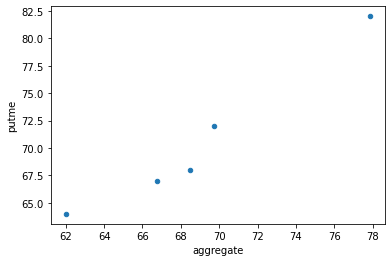

In [31]:
# Selectin by position
# pd.DataFrame().iloc[] # iloc uses the integer position. Endpoint is not consider too. Just about ussing integer to get position.
print(data)
data.iloc[11] # gets the 11th rows
data.iloc[11,1] #gets the 11th row first, then the putme variable 

#By integer slices, acting similar to NumPy/Python:

data.iloc[9:14, 1:5] #gets the 9th to 14th row with there 2nd and 3rd column
#Wow! Check the column side, it does not give error

data.iloc[9:14, 1:5].plot(kind='scatter', x='aggregate', y='putme') # Just doing some play

# By lists of integer position locations, similar to the NumPy/Python style:
data.iloc[[0,8,11], [0,2]] # Wow, Pandas is strategic. Select row 0,8 and 11 with there columns 1 and 3

try:
    data.iloc[[0,8,11], [0,3]]
except:
    print('It releases error if column does not exist')

In [35]:
# For slicing rows explicitly:

data.iloc[1:4, :]

# For slicing columns explicitly:

data.iloc[:, 1:3]

data.iloc[1,1]

# But using .iat is better for getting scalar values
# Note that both .at and .iat are used for getting scalar values

# .at is for index and columns selection
# .iat is for integer positioning
data.iat[1,1]

84

In [39]:
# Boolean Indexing
print([data['jamb']>300]) # It returns boolean values
data[data['jamb']>300]

data[data<100] # This checks all columns to see where condttions have been met.

[0      True
1      True
2      True
3     False
4      True
5      True
6      True
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14     True
Name: jamb, dtype: bool]


,jamb,putme,aggregate
0,NaN,78,76.875
1,NaN,84,83.250
2,NaN,78,79.250
3,NaN,76,75.250
4,NaN,77,76.500
5,NaN,80,79.000
6,NaN,88,86.500
7,NaN,86,84.250
8,NaN,75,73.500
9,NaN,82,77.875


In [45]:
# Using the isin() method for filtering:

data[data['jamb'].isin([303,330])] # Wow, this is crazy # Note that you pass a list into isin() method

,jamb,putme,aggregate
1,330,84,83.25
7,330,86,84.25


### Setting

In [50]:
# Setting a new column automatically aligns the data by the indexes
datar = data.copy()
datar['jamb'][0]  = 320
print(datar)

datar.iloc[0,2] = 320/8 + 78/2
datar

    jamb  putme  aggregate
0    320     78     76.875
1    330     84     83.250
2    320     78     79.250
3    298     76     75.250
4    304     77     76.500
5    312     80     79.000
6    340     88     86.500
7    330     86     84.250
8    288     75     73.500
9    295     82     77.875
10   270     72     69.750
11   266     67     66.750
12   240     64     62.000
13   276     68     68.500
14   306     82     79.250


C:\Users\Olusols\AppData\Local\Temp/ipykernel_8380/1535760361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datar['jamb'][0]  = 320


,jamb,putme,aggregate
0,320,78,79.000
1,330,84,83.250
2,320,78,79.250
3,298,76,75.250
4,304,77,76.500
5,312,80,79.000
6,340,88,86.500
7,330,86,84.250
8,288,75,73.500
9,295,82,77.875


### Missing Data

In [57]:
# Pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

# Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

datar.iloc[9,2] = np.nan # I just decide to set it to Null.
datar.loc[1, 'jamb'] = np.nan
# To drop any rows that have missing data.

# I want to use .dropna() to remove the column

datar.dropna(how='any') # please check for rows 9 and 1. They are gone.

# Filling missing data. so, we will use .fillna()
# datar.fillna(47) #please check for rows 9 and 1. They are set to 47

,jamb,putme,aggregate
0,320.0,78,79.0
2,320.0,78,79.25
3,298.0,76,75.25
4,304.0,77,76.5
5,312.0,80,79.0
6,340.0,88,86.5
7,330.0,86,84.25
8,288.0,75,73.5
10,270.0,72,69.75
11,266.0,67,66.75


In [65]:
# To get the boolean mask where values are nan.
pd.isna(datar) # Not this is a Pandas stuff, not a method



ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### Operations

In [69]:
# STATISTICAL OPERATIONS

# Note: Operations in general exclude missing data.
datar.describe() # Note that it is done column-wise

# To do it row-wise, pass 1 into mean, median, just like mean(1)
datar.mean(1)

0     159.000000
1      83.625000
2     159.083333
3     149.750000
4     152.500000
5     157.000000
6     171.500000
7     166.750000
8     145.500000
9     188.500000
10    137.250000
11    133.250000
12    122.000000
13    137.500000
14    155.750000
dtype: float64

In [72]:
# Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(1) #Please note the use of shift and broadcasting
print(s)

# Use .sub to subtract

2013-09-10    NaN
2013-09-11    1.0
2013-09-12    3.0
2013-09-13    5.0
2013-09-14    NaN
2013-09-15    6.0
Freq: D, dtype: float64


In [2]:
# Apply
# Applying functions to the data:

help(np.cumsum) #I think it works for cummulative summation

Help on function cumsum in module numpy:

cumsum(a, axis=None, dtype=None, out=None)
    Return the cumulative sum of the elements along a given axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        Axis along which the cumulative sum is computed. The default
        (None) is to compute the cumsum over the flattened array.
    dtype : dtype, optional
        Type of the returned array and of the accumulator in which the
        elements are summed.  If `dtype` is not specified, it defaults
        to the dtype of `a`, unless `a` has an integer dtype with a
        precision less than that of the default platform integer.  In
        that case, the default platform integer is used.
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output
        but the type will be cast if necessary. See :ref:`ufuncs-output-type` for

In [12]:
variable_one = 'variable'
dict_ = {'a': 1, 'b': 2, 'c': 3}
variable_two = dict_.get(variable_one,8)
variable_two



8

In [18]:
data.apply(np.cumsum) # data.apply(func,axis) Note that==> 0 is index, 1 is colmuns.
help(data.apply) # We use .apply() to add another function to  a dataset. We can add axis to it

Help on method apply in module pandas.core.frame:

apply(func: 'AggFuncType', axis: 'Axis' = 0, raw: 'bool' = False, result_type=None, args=(), **kwargs) method of pandas.core.frame.DataFrame instance
    Apply a function along an axis of the DataFrame.
    
    Objects passed to the function are Series objects whose index is
    either the DataFrame's index (``axis=0``) or the DataFrame's columns
    (``axis=1``). By default (``result_type=None``), the final return type
    is inferred from the return type of the applied function. Otherwise,
    it depends on the `result_type` argument.
    
    Parameters
    ----------
    func : function
        Function to apply to each column or row.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Axis along which the function is applied:
    
        * 0 or 'index': apply function to each column.
        * 1 or 'columns': apply function to each row.
    
    raw : bool, default False
        Determines if row or column is passed as 

In [24]:
data.apply(lambda x: x.mean())

jamb         298.533333
putme         77.133333
aggregate     75.900000
dtype: float64

In [27]:
#   Histogramming

np.random.randint(4,40,12)

array([18,  9, 18, 16,  6, 16, 22, 13, 35, 15, 33,  6])

In [39]:
number = pd.Series(np.random.randint(0,7,40)).value_counts(ascending=True)
print(number)
data.value_counts(ascending=True,dropna=True)
#help(number.value_counts)

jamb  putme  aggregate
240   64     62.000       1
266   67     66.750       1
270   72     69.750       1
276   68     68.500       1
288   75     73.500       1
295   82     77.875       1
298   76     75.250       1
303   78     76.875       1
304   77     76.500       1
306   82     79.250       1
312   80     79.000       1
320   78     79.250       1
330   84     83.250       1
      86     84.250       1
340   88     86.500       1
dtype: int64

In [42]:
string = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
print(string)
# Let's make lowercase

string.str.lower() # NOTE==> we added .str.lower()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# MERGE

In [70]:
#help(pd.concat)
#help(np.random.randn)

k = pd.DataFrame(np.random.randn(10,4))
ser = k
 # Note that I use .DataFrame with ..randn(), and .Series with ..randint()

# Note that ..randn uses normal distribution where mean=0, and variance=1

pieces = [ser[:3], ser[3:7], ser[7:]]
pieces

pd.concat(pieces)

a = pd.Series(np.array([1,2,3]))
b = pd.Series(np.linspace(4,24,5))
pd.concat([a,b], axis=1)

,0,1
0,1.0,4.0
1,2.0,9.0
2,3.0,14.0
3,NaN,19.0
4,NaN,24.0


In [22]:
import pandas as pd
p = pd.DataFrame({
    'lkey':['foo', 'bag'],
    
    
    'lval': ['key', 'val'],
}, index=['one', 'two'])




k = pd.DataFrame({
    'lkey':['for', 'bag'],
    'lval': ['key', 'val'],
}, index=['one', 'two'])



q = pd.DataFrame({
    'lkey':['for', 'bag'],
    
    
    'lval': ['key', 'val'],
    
    
}, index=['one', 'two'])
try:    
    
    pd.merge(p,k,q, on='key')

except:
    print('I do not think 3 can work together')



I do not think 3 can work together


### Grouping

In [77]:
import numpy as np

'''
 By “group by” we are referring to a process involving one or more of the following steps:
    • Splitting the data into groups based on some criteria
    • Applying a function to each group independently
    • Combining the results into a data structure
    
    
    
    
'''


df = pd.DataFrame(
     {
     "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
     "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
     "C": np.random.randn(8),
     "D": np.random.randn(8),
   }
 )

print(df)
print(df.groupby("A").sum())
print(df.groupby('B').sum())


print(df.groupby('A').mean())

# Grouping and then applying the sum() function to the resulting groups


# Grouping by multiple columns forms a hierarchical index, and again we can apply the sum() function

print(df.groupby(["A", "B"]).sum())

df.groupby(["B", "A"]).sum()

# Don't forget that np.array must have the same length, Series will add np.nan in case

mbbs = pd.DataFrame({
    
    'Name':np.array(['Olusola', 'Ezekiel', 'Esther', 'Victor', 'Olamide', 'Ololade', 'Adegoke', 'Toyosi', 'Rebecca', 'Ahmed']),
    'CPGA':np.array([3.86, 3.82, 4.00, 3.21, 3.78, 3.50, 3.87, 3.96, 3.21, 3.80]),
    'Class': pd.Series(['2k22', '2k21', '2k23', '2k22', '2k24', '2k20', '2k18', '2k22', '2k21', '2k22', '2k23'])
    
}, index = np.arange(1,11,1))

# I think groupby is used for categorical data
len(mbbs.groupby('Class')) # 6 classes in total

print(mbbs.groupby('Class').sum())
print(mbbs.groupby('Class').size()) # Note the difference between sum() and size()
(mbbs.groupby('Class')).skew()

     A      B         C         D
0  foo    one  0.462984  0.513006
1  bar    one  1.263249  1.218902
2  foo    two -0.006151 -0.178143
3  bar  three  0.743149 -0.445050
4  foo    two  0.474239  0.816476
5  bar    two  0.127285 -1.722137
6  foo    one -0.703253  0.075733
7  foo  three -0.015392  0.001753
            C         D
A                      
bar  2.133683 -0.948284
foo  0.212428  1.228825
              C         D
B                        
one    1.022980  1.807642
three  0.727757 -0.443297
two    0.595373 -1.083804
            C         D
A                      
bar  0.711228 -0.316095
foo  0.042486  0.245765
                  C         D
A   B                        
bar one    1.263249  1.218902
    three  0.743149 -0.445050
    two    0.127285 -1.722137
foo one   -0.240269  0.588739
    three -0.015392  0.001753
    two    0.468088  0.638333
        CPGA
Class       
2k18    3.50
2k20    3.78
2k21    7.82
2k22   11.08
2k23    7.62
2k24    3.21
Class
2k18    1
2k20    1
2k

C:\Users\Olusols\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\groupby\groupby.py:936: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return f(x, *args, **kwargs)


,CPGA
Class,
2k18,NaN
2k20,NaN
2k21,NaN
2k22,-1.550336
2k23,NaN
2k24,NaN


### Reshaping

In [38]:
help(zip)

'''
  The zip object yields n-length tuples, where n is the number of iterables
   passed as positional arguments to zip().  The i-th element in every tuple
   comes from the i-th iterable argument to zip(). 
 
   Note: This continues until the shortest argument is exhausted.
'''

# It yields a list of tuples

Help on class zip in module builtins:

class zip(object)
 |  zip(*iterables) --> A zip object yielding tuples until an input is exhausted.
 |  
 |     >>> list(zip('abcdefg', range(3), range(4)))
 |     [('a', 0, 0), ('b', 1, 1), ('c', 2, 2)]
 |  
 |  The zip object yields n-length tuples, where n is the number of iterables
 |  passed as positional arguments to zip().  The i-th element in every tuple
 |  comes from the i-th iterable argument to zip().  This continues until the
 |  shortest argument is exhausted.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and ret

In [88]:
list(zip('abcdefg', range(9), range(4))) # The short argument in this case is range(4)==>[0,1,2,3]

[('a', 0, 0), ('b', 1, 1), ('c', 2, 2), ('d', 3, 3)]

In [89]:
list(zip('abcdef', range(5,14), range(2,8))) # The short argument in this case is 'abcdef'

[('a', 5, 2), ('b', 6, 3), ('c', 7, 4), ('d', 8, 5), ('e', 9, 6), ('f', 10, 7)]

In [49]:
list(range(6)), list(range(8))

([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5, 6, 7])

In [50]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [60]:
import numpy as np
(np.linspace(3,4,10))

TypeError: type numpy.ndarray doesn't define __round__ method

In [3]:
data  = pd.read_csv('student.csv')
print(data.skew())
data.describe()

jamb        -0.507383
putme       -0.392673
aggregate   -0.475042
dtype: float64


,jamb,putme,aggregate
count,15.000000,15.000000,15.000000
mean,298.533333,77.133333,75.900000
std,27.226213,7.029191,6.808969
min,240.000000,64.000000,62.000000
25%,282.000000,73.500000,71.625000
50%,303.000000,78.000000,76.875000
75%,316.000000,82.000000,79.250000
max,340.000000,88.000000,86.500000


In [94]:
# Pivot Table

help(pd.pivot_table)

pd.pivot_table(data, index='putme', aggfunc=[np.mean, np.median, np.std])

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data: 'DataFrame', values=None, index=None, columns=None, aggfunc: 'AggFuncType' = 'mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True) -> 'DataFrame'
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an a

mean           median              std           
      aggregate   jamb aggregate   jamb aggregate       jamb
putme                                                       
64      62.0000  240.0   62.0000  240.0       NaN        NaN
67      66.7500  266.0   66.7500  266.0       NaN        NaN
68      68.5000  276.0   68.5000  276.0       NaN        NaN
72      69.7500  270.0   69.7500  270.0       NaN        NaN
75      73.5000  288.0   73.5000  288.0       NaN        NaN
76      75.2500  298.0   75.2500  298.0       NaN        NaN
77      76.5000  304.0   76.5000  304.0       NaN        NaN
78      78.0625  311.5   78.0625  311.5  1.679379  12.020815
80      79.0000  312.0   79.0000  312.0       NaN        NaN
82      78.5625  300.5   78.5625  300.5  0.972272   7.778175
84      83.2500  330.0   83.2500  330.0       NaN        NaN
86      84.2500  330.0   84.2500  330.0       NaN        NaN
88      86.5000  340.0   86.5000  340.0       NaN        NaN

In [5]:
mbbs

,Name,CPGA,Class
1,Olusola,3.86,2k21
2,Ezekiel,3.82,2k23
3,Esther,4.00,2k22
4,Victor,3.21,2k24
5,Olamide,3.78,2k20
6,Ololade,3.50,2k18
7,Adegoke,3.87,2k22
8,Toyosi,3.96,2k21
9,Rebecca,3.21,2k22
10,Ahmed,3.80,2k23


In [20]:
# Create a spreadsheet-style pivot table as a DataFrame.
# It works best wih categorical data

pd.pivot_table(mbbs, index='CPGA')
#pd.pivot_table(data,values='putme')
help(pd.pivot_table)

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data: 'DataFrame', values=None, index=None, columns=None, aggfunc: 'AggFuncType' = 'mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True) -> 'DataFrame'
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an a

In [39]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                            "bar", "bar", "bar", "bar"],
                    "B": ["one", "two", "one", "one", "two",
                            "two", "one", "two", "one"],
                      "C": ["small", "large", "large", "small",
                            "small", "large", "large", "small",
                            "large"],
                      "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                      "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})

print(df)
print(pd.pivot_table(df, values=['D', 'E'], index=['A', 'B'], columns=['C']))

# We have np.nan in our data set, so we can either add attributes fill_value or dropna
# Let's try the two

#fill_value
print((pd.pivot_table(df, values=['D', 'E'], index=['A', 'B'], columns=['C'], fill_value=9))) # Anywhere there's np.nan is automatically fil with 9

#dropna
(pd.pivot_table(df, values=['D', 'E'], index=['A', 'B'], columns=['C'], dropna=True))

#Pivot table works best with categorical data

     A    B      C  D  E
0  foo  one  small  1  2
1  foo  two  large  2  4
2  foo  one  large  2  5
3  foo  one  small  3  5
4  foo  two  small  3  6
5  bar  two  large  4  6
6  bar  one  large  5  8
7  bar  two  small  6  9
8  bar  one  large  7  9
            D           E      
C       large small large small
A   B                          
bar one   6.0   NaN   8.5   NaN
    two   4.0   6.0   6.0   9.0
foo one   2.0   2.0   5.0   3.5
    two   2.0   3.0   4.0   6.0
            D           E      
C       large small large small
A   B                          
bar one     6     9   8.5   9.0
    two     4     6   6.0   9.0
foo one     2     2   5.0   3.5
    two     2     3   4.0   6.0


D           E      
C       large small large small
A   B                          
bar one   6.0   NaN   8.5   NaN
    two   4.0   6.0   6.0   9.0
foo one   2.0   2.0   5.0   3.5
    two   2.0   3.0   4.0   6.0

In [ ]:
# We can aswell work on the numerical data types
(pd.pivot_table(df, values=['D', 'E'], index=['A', 'B'], columns=['C'], aggfunc={
    'D': np.mean,
    'E': [np.sum, np.median],
}))

# This is will be mad for explorative data analysis

### Time Series

In [16]:
rng = pd.date_range("18/04/2022", '27/05/2027',freq="M") # If I give start and end date, i don't need period again
len(rng)
#help(pd.date_range)
np.random.randint(0,500,100)
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts


'''
To use resample with our dataset, The object must have a datetime-like index (`DatetimeIndex`, `PeriodIndex`,
    or `TimedeltaIndex`), or the caller must pass the label of a datetime-like
    series/index to the ``on``/``level`` keyword parameter.
'''

ts.resample('M').sum()

ValueError: Of the four parameters: start, end, periods, and freq, exactly three must be specified

In [52]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="Y")

# Note that pd.date_range() return DateTimeIndex(An immutable container for datetimes.)

ts = pd.Series(np.random.randn(len(rng)), rng) # pd.Series only accept one-dimensional data

# , rng is serving as the index in this case. It does not accept columns
ts

try:
    
    pd.Series(np.random.randn(len(rng),7))
    
except:
    print('pd.Series only accept 1-D data. This will give a 5 x 7 ')

pd.Series only accept 1-D data. This will give a 5 x 7 


In [49]:
print(pd.DataFrame(np.random.randn(len(rng),7)))

          0         1         2         3         4         5         6
0  0.838870  0.945349 -0.122805 -0.506092 -0.638430  0.515497 -0.421783
1 -0.484753  1.622457 -0.426572  0.644835 -0.905480  1.717958 -0.540368
2  0.823308  0.261797  1.373598  0.733803 -0.928406 -0.777312 -2.294662
3 -0.556783 -1.408647 -0.138669 -1.619498  0.514648 -0.614298 -0.103866
4 -0.217356 -0.585406  0.868933  1.279033  1.140592  0.487404 -0.938062


In [57]:
print(ts)
time = ts.tz_localize('UTC') # We can localize our time. We tell pandas this is our local time

# Or even convert to another time zone

time.tz_convert('US/Eastern') # We have to localize first before we convert to another time zone
ts.to_period() # Actually, this depends on the frequency set initially

# For example,
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="M")
ran = pd.date_range('3/6/2012 00:00', periods=5, freq='Y')

# Note that pd.date_range() return DateTimeIndex(An immutable container for datetimes.)

ts = pd.Series(np.random.randn(len(rng)), rng) # pd.Series only accept one-dimensional data
tn = pd.Series(np.random.randn(len(ran)), ran)
print(ts.to_period)
tn.to_period() # Please, check the differences betweeen the result

print(ts.to_timestamp)
tn.to_timestamp()

2012-03-31   -0.517692
2012-04-30    0.984386
2012-05-31    1.429955
2012-06-30   -0.455059
2012-07-31   -0.651568
Freq: M, dtype: float64
<bound method Series.to_period of 2012-03-31   -0.550594
2012-04-30   -0.594379
2012-05-31   -0.158401
2012-06-30    2.178814
2012-07-31    0.190528
Freq: M, dtype: float64>
<bound method Series.to_timestamp of 2012-03-31   -0.550594
2012-04-30   -0.594379
2012-05-31   -0.158401
2012-06-30    2.178814
2012-07-31    0.190528
Freq: M, dtype: float64>


TypeError: unsupported Type DatetimeIndex

In [44]:
help(pd.date_range)

Help on function date_range in module pandas.core.indexes.datetimes:

date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize: 'bool' = False, name: 'Hashable' = None, closed=None, **kwargs) -> 'DatetimeIndex'
    Return a fixed frequency DatetimeIndex.
    
    Returns the range of equally spaced time points (where the difference between any
    two adjacent points is specified by the given frequency) such that they all
    satisfy `start <[=] x <[=] end`, where the first one and the last one are, resp.,
    the first and last time points in that range that fall on the boundary of ``freq``
    (if given as a frequency string) or that are valid for ``freq`` (if given as a
    :class:`pandas.tseries.offsets.DateOffset`). (If exactly one of ``start``,
    ``end``, or ``freq`` is *not* specified, this missing parameter can be computed
    given ``periods``, the number of timesteps in the range. See the note below.)
    
    Parameters
    ----------
    start : str or

### Categoricals

In [63]:
# pandas can include categorical data in a DataFrame

print(mbbs)

# Let's convert our Class column to a categorical data

mbbs['Class'] = mbbs['Class'].astype('category')
mbbs['Class'].dtype # Wow our data is now in categories

       Name  CPGA Class
1   Olusola  3.86  2k21
2   Ezekiel  3.82  2k23
3    Esther  4.00  2k22
4    Victor  3.21  2k24
5   Olamide  3.78  2k20
6   Ololade  3.50  2k18
7   Adegoke  3.87  2k22
8    Toyosi  3.96  2k21
9   Rebecca  3.21  2k22
10    Ahmed  3.80  2k23


CategoricalDtype(categories=['2k18', '2k20', '2k21', '2k22', '2k23', '2k24'], ordered=False)

In [74]:
'''
  We can as well rename our category
     e.g   df["grade"].cat.categories = ["very good", "good", "very bad"]
     
  And still rename it
     e.g   df["grade"] = df["grade"].cat.set_categories(
               ["very bad", "bad", "medium", "good", "very good"]


'''

# Let's rename our Class

mbbs['Class']  = mbbs['Class'].cat.set_categories(['2k18', '2k19', '2k20', '2k21', '2k22', '2k23', '2k24'])
mbbs['Class']
mbbs

# Let's sort

mbbs.Class # Though, this will work, it's not advisable
mbbs.sort_values(by='Class') # Note by sorting is by categories, not in lexical order

mbbs.sort_values(by='CPGA') # Can as well sort if not in category

mbbs.groupby(by='Class').size() # Wow, this is interesting. To check the number in each category

Class
2k18    1
2k19    0
2k20    1
2k21    2
2k22    3
2k23    2
2k24    1
dtype: int64

### Plotting

Class
2k18    AxesSubplot(0.125,0.125;0.775x0.755)
2k20    AxesSubplot(0.125,0.125;0.775x0.755)
2k21    AxesSubplot(0.125,0.125;0.775x0.755)
2k22    AxesSubplot(0.125,0.125;0.775x0.755)
2k23    AxesSubplot(0.125,0.125;0.775x0.755)
2k24    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

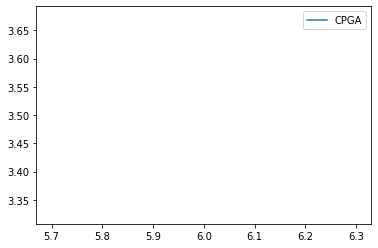

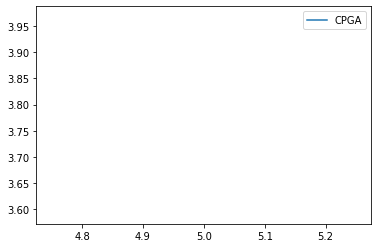

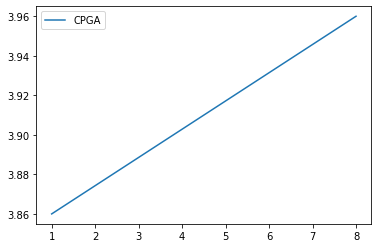

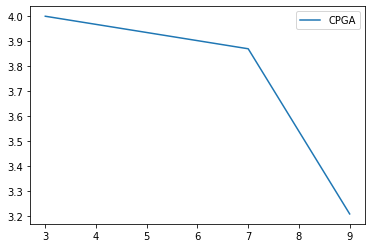

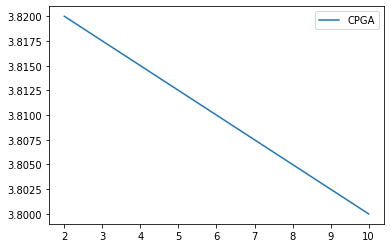

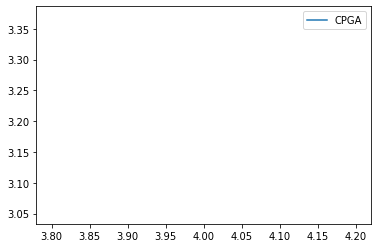

In [79]:
mbbs.groupby('Class').plot()

### Getting Data In/Out

In [80]:
mbbs.to_csv('mbbs.csv') # I just created a new file 'mbbs.csv'

In [81]:
pd.read_csv('mbbs.csv') # That's how things are done

,Unnamed: 0,Name,CPGA,Class
0,1,Olusola,3.86,2k21
1,2,Ezekiel,3.82,2k23
2,3,Esther,4.00,2k22
3,4,Victor,3.21,2k24
4,5,Olamide,3.78,2k20
5,6,Ololade,3.50,2k18
6,7,Adegoke,3.87,2k22
7,8,Toyosi,3.96,2k21
8,9,Rebecca,3.21,2k22
9,10,Ahmed,3.80,2k23


In [88]:
# To write to excel, in need to specify the Sheet Name
#mbbs.to_excel("foo.xlsx", sheet_name="Sheet1") # Wow, not worrking
help(mbbs.to_excel)
mbbs.to_excel('mbbs.xlsx') # Excel not working here
#pd.read_excel('mbbs.xlsx', sheet='First Sheet')

# Maybe I need to upgrade

Help on method to_excel in module pandas.core.generic:

to_excel(excel_writer, sheet_name: 'str' = 'Sheet1', na_rep: 'str' = '', float_format: 'str | None' = None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True, freeze_panes=None, storage_options: 'StorageOptions' = None) -> 'None' method of pandas.core.frame.DataFrame instance
    Write object to an Excel sheet.
    
    To write a single object to an Excel .xlsx file it is only necessary to
    specify a target file name. To write to multiple sheets it is necessary to
    create an `ExcelWriter` object with a target file name, and specify a sheet
    in the file to write to.
    
    Multiple sheets may be written to by specifying unique `sheet_name`.
    With all data written to the file it is necessary to save the changes.
    Note that creating an `ExcelWriter` object with a file name that already
    exists will result in t

ModuleNotFoundError: No module named 'openpyxl'

## Essential basic functionality

#### Here we discuss a lot of the essential functionality common to the pandas data structures.

In [8]:
index = pd.date_range("1/1/2000", periods=20)
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
df = pd.DataFrame(np.random.randn(20, 6), index=index, columns=["A", "B", "C", 'D', 'E', 'F'])
df


,A,B,C,D,E,F
2000-01-01,0.338199,-0.314860,-1.816502,-0.306141,1.588198,-0.661398
2000-01-02,-0.583903,0.621386,-0.915863,-0.026457,0.058918,2.439528
2000-01-03,-0.884087,-1.133550,-0.261331,0.748258,-0.446703,-1.034156
2000-01-04,-0.109541,-0.255046,-0.733263,2.494179,0.715144,-0.123538
2000-01-05,-0.911894,0.552664,-0.550695,-0.741199,-0.117216,0.089553
2000-01-06,-2.083584,1.272074,0.645973,0.775683,-1.128764,-0.705468
2000-01-07,-0.535927,3.331999,0.333328,-2.462621,1.140416,1.874668
2000-01-08,-1.939397,-0.171576,-1.074306,-0.151633,0.772465,-0.775003
2000-01-09,-1.638506,0.947484,0.199689,-0.616409,1.866726,-0.640005
2000-01-10,-0.011127,0.474402,0.483959,-1.061914,1.321278,-0.735458


In [94]:
# Head and Tail
# Both head and tail deal with rows ===> .head(number of rows from the start)

# To view a small sample of a Series or DataFrame object, use the head() and tail() methods. The default number of elements to display is five, but you may pass a custom number.

df.head(7) # To see the first 7 rows

,A,B,C,D,E,F
2000-01-01,-0.530569,-0.500374,1.358967,0.029662,0.092077,0.821349
2000-01-02,0.098394,-1.327635,-1.027319,-0.929851,0.571227,1.195233
2000-01-03,2.136438,1.029023,0.620393,0.432609,-0.389342,-1.023812
2000-01-04,-0.803602,0.005647,-0.632200,0.822142,-0.172540,0.755467
2000-01-05,-0.101740,-1.639887,0.685980,0.796416,0.617687,0.251757
2000-01-06,0.577128,-1.203792,0.679901,0.565131,-1.388106,0.167801
2000-01-07,-1.096060,-3.081549,-1.859676,-1.525765,-0.613305,0.300628


In [95]:
df.tail(2)

,A,B,C,D,E,F
2000-01-19,0.343857,2.413297,1.103997,2.010007,-0.057760,-0.397023
2000-01-20,-0.084678,0.061359,0.108182,0.933823,-1.527296,0.500234


In [97]:
df.tail(5)

,A,B,C,D,E,F
2000-01-16,0.202439,0.757423,0.662417,2.825292,-1.058537,-0.833177
2000-01-17,0.521320,-0.869516,-1.188147,0.714847,2.582943,-0.124858
2000-01-18,0.867617,-0.152985,-2.862043,0.401606,0.502472,0.545768
2000-01-19,0.343857,2.413297,1.103997,2.010007,-0.057760,-0.397023
2000-01-20,-0.084678,0.061359,0.108182,0.933823,-1.527296,0.500234


In [99]:
df.tail(5).iloc[1:3, 3]

2000-01-17    0.714847
2000-01-18    0.401606
Freq: D, Name: D, dtype: float64

In [102]:
'''
 Note:
      pandas objects (Index, Series, DataFrame) can be thought of as containers for arrays, which hold the actual
    data and do the actual computation. For many types, the underlying array is a numpy.ndarray. However, pandas
    and 3rd party libraries may extend NumPy’s type system to add support for custom arrays (see dtypes).

'''
print(df.index.array)
df.columns.array # We can always get the array behind our index or column

<DatetimeArray>
['2000-01-01 00:00:00', '2000-01-02 00:00:00', '2000-01-03 00:00:00',
 '2000-01-04 00:00:00', '2000-01-05 00:00:00', '2000-01-06 00:00:00',
 '2000-01-07 00:00:00', '2000-01-08 00:00:00', '2000-01-09 00:00:00',
 '2000-01-10 00:00:00', '2000-01-11 00:00:00', '2000-01-12 00:00:00',
 '2000-01-13 00:00:00', '2000-01-14 00:00:00', '2000-01-15 00:00:00',
 '2000-01-16 00:00:00', '2000-01-17 00:00:00', '2000-01-18 00:00:00',
 '2000-01-19 00:00:00', '2000-01-20 00:00:00']
Length: 20, dtype: datetime64[ns]


<PandasArray>
['A', 'B', 'C', 'D', 'E', 'F']
Length: 6, dtype: object

In [106]:
# If you know you need a NumPy array, use to_numpy() or numpy.asarray()
df.columns.array.to_numpy()

'''
 Note:
     to_numpy() gives some control over the dtype of the resulting numpy.ndarray. For example, consider date times with timezones. NumPy doesn’t have a dtype to represent timezone-aware datetimes, so there are two possibly
   useful representations:
       1. An object-dtype numpy.ndarray with Timestamp objects, each with the correct tz
       2. A datetime64[ns] -dtype numpy.ndarray, where the values have been converted to UTC and the timezone discarded
       
   Timezones may be preserved with dtype=object

'''
print(df.index.array.to_numpy(dtype=object)) #dtype ==> object dtype specified
df.index.array.to_numpy() # Note the difference #dtype ==> datetime64[ns]

# Please,note the data types

[Timestamp('2000-01-01 00:00:00', freq='D')
 Timestamp('2000-01-02 00:00:00', freq='D')
 Timestamp('2000-01-03 00:00:00', freq='D')
 Timestamp('2000-01-04 00:00:00', freq='D')
 Timestamp('2000-01-05 00:00:00', freq='D')
 Timestamp('2000-01-06 00:00:00', freq='D')
 Timestamp('2000-01-07 00:00:00', freq='D')
 Timestamp('2000-01-08 00:00:00', freq='D')
 Timestamp('2000-01-09 00:00:00', freq='D')
 Timestamp('2000-01-10 00:00:00', freq='D')
 Timestamp('2000-01-11 00:00:00', freq='D')
 Timestamp('2000-01-12 00:00:00', freq='D')
 Timestamp('2000-01-13 00:00:00', freq='D')
 Timestamp('2000-01-14 00:00:00', freq='D')
 Timestamp('2000-01-15 00:00:00', freq='D')
 Timestamp('2000-01-16 00:00:00', freq='D')
 Timestamp('2000-01-17 00:00:00', freq='D')
 Timestamp('2000-01-18 00:00:00', freq='D')
 Timestamp('2000-01-19 00:00:00', freq='D')
 Timestamp('2000-01-20 00:00:00', freq='D')]


array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000',
       '2000-01-05T00:00:00.000000000', '2000-01-06T00:00:00.000000000',
       '2000-01-07T00:00:00.000000000', '2000-01-08T00:00:00.000000000',
       '2000-01-09T00:00:00.000000000', '2000-01-10T00:00:00.000000000',
       '2000-01-11T00:00:00.000000000', '2000-01-12T00:00:00.000000000',
       '2000-01-13T00:00:00.000000000', '2000-01-14T00:00:00.000000000',
       '2000-01-15T00:00:00.000000000', '2000-01-16T00:00:00.000000000',
       '2000-01-17T00:00:00.000000000', '2000-01-18T00:00:00.000000000',
       '2000-01-19T00:00:00.000000000', '2000-01-20T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [107]:
'''
  Getting the “raw data” inside a DataFrame is possibly a bit more complex. 

  When your DataFrame only has a single data type for all the columns, DataFrame.to_numpy() will return the underlying data:
  Note the preference we talked about in numpy(object ==> str ==> number)
  
   Note: When working with heterogeneous data, the dtype of the resulting ndarray will be chosen to accommodate all
   of the data involved. For example, if strings are involved, the result will be of object dtype. If there are only floats and
   integers, the resulting array will be of float dtype.


'''
mbbs.to_numpy()

array([['Olusola', 3.86, '2k21'],
       ['Ezekiel', 3.82, '2k23'],
       ['Esther', 4.0, '2k22'],
       ['Victor', 3.21, '2k24'],
       ['Olamide', 3.78, '2k20'],
       ['Ololade', 3.5, '2k18'],
       ['Adegoke', 3.87, '2k22'],
       ['Toyosi', 3.96, '2k21'],
       ['Rebecca', 3.21, '2k22'],
       ['Ahmed', 3.8, '2k23']], dtype=object)

In [114]:
mbbs.groupby('CPGA').size()

CPGA
3.21    2
3.50    1
3.78    1
3.80    1
3.82    1
3.86    1
3.87    1
3.96    1
4.00    1
dtype: int64

### Flexible binary operations

In [2]:
'''
    With binary operations between pandas data structures, there are two key points of interest:
        >> Broadcasting behavior between higher- (e.g. DataFrame) and lower-dimensional (e.g. Series) objects.
         
        >> Missing data in computations.
        
    We will demonstrate how to manage these issues independently, though they can be handled simultaneously

'''



'\n    With binary operations between pandas data structures, there are two key points of interest:\n        >> Broadcasting behavior between higher- (e.g. DataFrame) and lower-dimensional (e.g. Series) objects.\n         \n        >> Missing data in computations.\n        \n    We will demonstrate how to manage these issues independently, though they can be handled simultaneously\n\n'

In [7]:
np.linspace(2,4,3).astype('int')

array([2, 3, 4])

In [14]:
# Matching / broadcasting behavior

'''
  DataFrame has the methods 
  
            add(), 
            sub(), 
            mul(), 
            div() and 
            related functions radd(), rsub(),
  for carrying out binary operations. For broadcasting behavior, Series input is of primary interest. Using these functions,
you can use to either match on the index or columns via the axis keyword:


'''
df.index = [x.upper() for x in 'abcdefghikjlmnopqrst']
df

,A,B,C,D,E,F
A,0.338199,-0.314860,-1.816502,-0.306141,1.588198,-0.661398
B,-0.583903,0.621386,-0.915863,-0.026457,0.058918,2.439528
C,-0.884087,-1.133550,-0.261331,0.748258,-0.446703,-1.034156
D,-0.109541,-0.255046,-0.733263,2.494179,0.715144,-0.123538
E,-0.911894,0.552664,-0.550695,-0.741199,-0.117216,0.089553
F,-2.083584,1.272074,0.645973,0.775683,-1.128764,-0.705468
G,-0.535927,3.331999,0.333328,-2.462621,1.140416,1.874668
H,-1.939397,-0.171576,-1.074306,-0.151633,0.772465,-0.775003
I,-1.638506,0.947484,0.199689,-0.616409,1.866726,-0.640005
K,-0.011127,0.474402,0.483959,-1.061914,1.321278,-0.735458


In [27]:
row = df.iloc[2] # check the row C
row

A   -0.884087
B   -1.133550
C   -0.261331
D    0.748258
E   -0.446703
F   -1.034156
Name: C, dtype: float64

In [28]:
column = df['A']
column

A    0.338199
B   -0.583903
C   -0.884087
D   -0.109541
E   -0.911894
F   -2.083584
G   -0.535927
H   -1.939397
I   -1.638506
K   -0.011127
J   -0.131519
L    0.557256
M    0.782466
N   -0.295204
O    0.112877
P    0.388271
Q   -1.676129
R   -0.023937
S    0.602013
T    0.589050
Name: A, dtype: float64

In [29]:
df.sub(column, axis=0)#.dropna(axis=1) # Wow, note that this subtract across the column if axis is not specified. This is done in each row

,A,B,C,D,E,F
A,0.0,-0.653059,-2.154700,-0.644339,1.250000,-0.999597
B,0.0,1.205289,-0.331960,0.557446,0.642822,3.023431
C,0.0,-0.249463,0.622756,1.632345,0.437384,-0.150069
D,0.0,-0.145505,-0.623722,2.603720,0.824685,-0.013997
E,0.0,1.464558,0.361198,0.170695,0.794678,1.001447
F,0.0,3.355658,2.729557,2.859267,0.954819,1.378116
G,0.0,3.867926,0.869255,-1.926694,1.676342,2.410595
H,0.0,1.767821,0.865091,1.787764,2.711862,1.164394
I,0.0,2.585990,1.838195,1.022097,3.505232,0.998501
K,0.0,0.485529,0.495086,-1.050787,1.332405,-0.724331


In [31]:
df.sub(row, axis=1) # Note how this works. The division is made by default row, nut you've got to change it

,A,B,C,D,E,F
A,1.222285,0.818690,-1.555171,-1.054399,2.034901,0.372758
B,0.300184,1.754936,-0.654532,-0.774715,0.505622,3.473684
C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
D,0.774546,0.878503,-0.471932,1.745921,1.161847,0.910618
E,-0.027807,1.686214,-0.289365,-1.489457,0.329487,1.123709
F,-1.199497,2.405624,0.907304,0.027425,-0.682061,0.328688
G,0.348160,4.465549,0.594658,-3.210879,1.587119,2.908824
H,-1.055310,0.961973,-0.812976,-0.899891,1.219168,0.259153
I,-0.754419,2.081033,0.461020,-1.364667,2.313430,0.394151
K,0.872960,1.607952,0.745290,-1.810172,1.767981,0.298697


In [39]:
# Furthermore you can align a level of a MultiIndexed DataFrame with a Series
dfmi = df[:4].copy()
dfmi.index = pd.MultiIndex.from_tuples(
    [(1, "a"), (1, "b"), (1, "c"), (2, "a")], names=["first", "second"]
 )
print(dfmi) # Wow, this is actually MultiIndex.from_tuples(list)

dfmi.at[(1, 'a'), 'A']

# For np.nan, you can use dropna() to remove them, or use fill_values(4) to add value to them

                     A         B         C         D         E         F
first second                                                            
1     a       0.338199 -0.314860 -1.816502 -0.306141  1.588198 -0.661398
      b      -0.583903  0.621386 -0.915863 -0.026457  0.058918  2.439528
      c      -0.884087 -1.133550 -0.261331  0.748258 -0.446703 -1.034156
2     a      -0.109541 -0.255046 -0.733263  2.494179  0.715144 -0.123538


0.3381985598532322

In [42]:
'''
Series and Index also support the divmod() builtin. This function takes the floor division and modulo operation at the same time returning a two-tuple of the same type as the left hand side. 
'''
s = pd.Series(np.arange(10))
print(s)

div, rem = divmod(s,3) #div==> result of the division, rem==> remainder
rem

# We can also do elementwise divmod()

div, rem = divmod(s, [0,1,2,3,4,5,6,7,8,9])
 #  should return 0s
div, rem # should return 1s

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32


(0    0
 1    1
 2    1
 3    1
 4    1
 5    1
 6    1
 7    1
 8    1
 9    1
 dtype: int32,
 0    0
 1    0
 2    0
 3    0
 4    0
 5    0
 6    0
 7    0
 8    0
 9    0
 dtype: int32)

In [44]:
# Let's practice something

def stats(x):
    import numpy as np
    mean = np.mean(x)
    median = np.median(x)
    return mean, median

arr = [1,5,6,3,7,4,9,4]
mean, median = stats(arr)
median



4.5

In [60]:
# Missing data / operations with fill values
# Let's work with np.nan


rw = df.sub(row, axis=0) #default is column-wise

# Note that as it works for sub(), it works like-wise for others  add(), sub(), mul(), div() and related functions radd(), rsub(),for carrying out binary operations.

In [59]:
data = pd.read_csv('student.csv')
data.iat[0,2]  = 71
print(data)
for ind in data.index:
    data['aggregate'] = data.jamb/8 + data.putme/2
data

    jamb  putme  aggregate
0    303     78     71.000
1    330     84     83.250
2    320     78     79.250
3    298     76     75.250
4    304     77     76.500
5    312     80     79.000
6    340     88     86.500
7    330     86     84.250
8    288     75     73.500
9    295     82     77.875
10   270     72     69.750
11   266     67     66.750
12   240     64     62.000
13   276     68     68.500
14   306     82     79.250


,jamb,putme,aggregate
0,303,78,76.875
1,330,84,83.250
2,320,78,79.000
3,298,76,75.250
4,304,77,76.500
5,312,80,79.000
6,340,88,86.500
7,330,86,84.250
8,288,75,73.500
9,295,82,77.875


In [62]:
'''
In Series and DataFrame, the arithmetic functions have the option of inputting a fill_value, namely a value to substitute
when at most one of the values at a location are missing. For example, when adding two DataFrame objects, you may
wish to treat NaN as 0 unless both DataFrames are missing that value, in which case the result will be NaN (you can
later replace NaN with some other value using fillna if you wish).
'''

rw.fillna(4)
rw.dropna() # Please look at how the two works

,A,B,C,D,E,F
A,1.222285,0.569227,-0.932415,0.577946,2.472285,0.222689
B,0.549646,1.754936,0.217687,1.107093,1.192468,3.573078
C,-0.622756,-0.872219,0.000000,1.009589,-0.185373,-0.772825
D,-0.857799,-1.003304,-1.481521,1.745921,-0.033114,-0.871796
E,-0.465190,0.999368,-0.103992,-0.294496,0.329487,0.536256
F,-1.049428,2.306230,1.680129,1.809839,-0.094609,0.328688


In [88]:
# Fexible Comparisons
# Series and DataFrame have the binary comparison methods eq, ne, lt, gt, le, and ge whose behavior is analogous to the binary arithmetic operations described above:

data1 = pd.DataFrame({
    
    'one' : pd.Series([1,2,3,4,5,6]),
    'two': np.linspace(1,18,6),
    'three': np.arange(3,20,3)
    
})
data2  = pd.DataFrame(np.random.randn(6,3)*9, columns=['one', 'two', 'three'])

# Let's compare data1 and data2
print(data1)
print(data2)

data1.gt(data2) # If data does not have the same shape, it's still workable
# It's better you have the same column and index

data1.eq(data2) # No row, column is equal

data1.ne(data2) # Not equal - ne ==> All equal
#  eq, ne, lt, gt, le, and ge
'''

eq = is equal
ne = is not equal
lt = is less than
gt = is greater than
le = is less than
ge = is less than

'''

   one   two  three
0    1   1.0      3
1    2   4.4      6
2    3   7.8      9
3    4  11.2     12
4    5  14.6     15
5    6  18.0     18
        one        two      three
0 -9.704623   7.469497  -6.066520
1 -4.588750  -6.059141   9.086670
2 -2.662673   7.367398  14.375739
3  5.316958   6.310206   4.707258
4  5.545339  -7.691144  -1.449433
5  2.538835 -13.919973   4.521793


'\n\neq = is equal\nne = is not equal\nlt = is less than\ngt = is greater than\nle = is less than\nge = is less than\n\n'

In [83]:
# You can apply the reductions: empty, any(), all(), and bool() to provide a way to summarize a boolean result
(data1 < 0).any() # It works row-wise, and column-wise

data1.iloc[0,2] = np.nan
print(data1)
data1.empty

   one   two  three
0    1   1.0    NaN
1    2   4.4    6.0
2    3   7.8    9.0
3    4  11.2   12.0
4    5  14.6   15.0
5    6  18.0   18.0


False

In [166]:
# We can compare array-like objects
#pd.Series(['a', 'b', 'c', 'd']) == np.array(['a', 'd'])

#pd.Series(["foo", "bar", "baz"]) == "foo"

data + data == (data*2) #If any of the row, column has np.nan, it return False, because
np.nan == np.nan  # This gives us False
data.empty #If DataFrame is empty, return True, if not return False.

(data+data).equals(data*2) # Note in this case, np.nan will be trated as equal. That is everything is equal
pd.Series(['a', 'b', 'c', 'd']) == np.array(['a', 'd', 'e', 'f']) # They must be identically placed



0     True
1    False
2    False
3    False
dtype: bool

## Get a grip at Pandas ==> Online Tutorials

In [7]:
data = pd.read_csv('heart.csv')
data
# To generate a detail report of  dataset, you can pip install pandas_profiling
# Then use pandas_profiling.ProfileReport(data) 
# It will generate a detail report
data.columns.tolist()  # Wow, this is now a python list

pd.options.display.max_rows = 15

In [115]:
data.iloc[[0,298,302], [0,3,4,7]] # interesting with iloc

,age,trestbps,chol,thalach
0,63,145,233,150
298,57,140,241,123
302,57,130,236,174


In [116]:
data.loc[[0,298, 302], ['age', 'trestbps', 'chol', 'thalach']]

,age,trestbps,chol,thalach
0,63,145,233,150
298,57,140,241,123
302,57,130,236,174


In [57]:
%time
data

Wall time: 0 ns


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_dict,sex_d
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,male,male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,male,male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,female,female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,male,male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,female,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,female,female
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,male,male
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,male,male
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,male,male


In [40]:
data['sex'].value_counts(dropna=False)
len(data)
# .sum sums everything in each column

303

In [32]:
dico_sex = {
    1: 'male', 
    0: 'female',
}
data['sex_d'] = data['sex'].map(dico_sex) 

# So, I will be usig .map() to do some cool things. Our algorithm always recognizes number not text

Wall time: 0 ns


<AxesSubplot:>

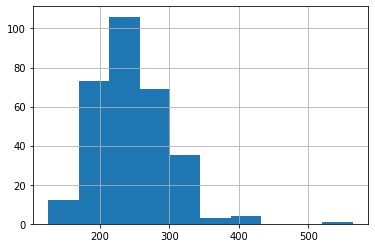

In [73]:
%time
data
#help(data['sex'].value_counts)
data['sex'].value_counts(normalize=True,sort=True, ascending=True)

# Always use help to check the documentation
data['chol'].hist()

In [59]:
data.sex

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64

In [60]:
data.isnull().sum() # Wow, our data has already been cleaned.

age         0
sex         0
cp          0
trestbps    0
chol        0
           ..
ca          0
thal        0
target      0
sex_dict    0
sex_d       0
Length: 16, dtype: int64

In [124]:
chol_median = pd.pivot_table(data, 'chol', index=['sex', 'age'], aggfunc=np.median)
chol_median

chol
sex age       
0   34   210.0
    35   183.0
    37   215.0
    39   209.5
    41   236.0
...        ...
1   67   245.5
    68   274.0
    69   244.0
    70   257.0
    77   304.0

[73 rows x 1 columns]

In [146]:
#x = chol_median.apply(lambda x:x.loc[0], axis=1)
#print(data.apply(lambda x: x.loc[76], axis=0)) # Wow, this apply actually depends on the axis
#data.loc[76]
#print(x)
#data['sex'][data['sex']<1].count()
chol_median.sample(frac=0.3) #I think sample takes at random. A sample of the data


chol
sex age       
1   65   251.0
    29   204.0
0   66   228.0
1   45   264.0
0   61   318.5
...        ...
    65   314.5
1   43   247.0
0   49   270.0
1   58   234.0
0   63   252.0

[22 rows x 1 columns]

### Lambda Function ==> Edureka

In [71]:
# Lambda function does not have a name. They are called anonymous function
# Syntax ==> lambda argument(s): expression
a = lambda a: a+a
a(3)

def A():
    return (lambda x: x**x)
t= A()
t(9)

387420489

In [148]:
# data['sex'].apply(lambda x: x['sex'] < 1)
x = lambda x: x['sex']
x(data)

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64

### Descriptive Statistics

In [237]:
'''
There exists a large number of methods for computing descriptive statistics and other related operations on Series,
DataFrame. 

Most of these are aggregations (hence producing a lower-dimensional result) like sum(), mean(), and
quantile(), but some of them, like cumsum() and cumprod(), produce an object of the same size. 

Generally speaking, these methods take an axis argument, just like ndarray.{sum, std, . . . }, but the axis can be specified by name
or integer:
       • Series: no axis argument needed
       • DataFrame: “index” (axis=0, default), “columns” (axis=1)

Also Note that, All such methods have a skipna option signaling whether to exclude missing data (True by default):
'''

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [179]:
# Let's do some stats
data.mean() # method is performed on the column

'''
Note that methods like cumsum() and cumprod() preserve the location of NaN values. This is somewhat different
from expanding() and rolling() since NaN behavior is furthermore dictated by a min_periods parameter.



'''
data.cumsum() #do the summation
data.cumprod() # do the multiplication

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3000,0,0,1,1
1,2331,1,6,18850,58250,0,0,28050,0,8.0500,0,0,2,1
2,95571,0,6,2450500,11883000,0,0,4824600,0,11.2700,0,0,4,1
3,5351976,0,6,294060000,2804388000,0,0,858778800,0,9.0160,0,0,8,1
4,305062632,0,0,35287200000,992753352000,0,0,139980944400,0,5.4096,0,0,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,0,0,0,0,0,0,0.0000,0,0,0,0
299,0,0,0,0,0,0,0,0,0,0.0000,0,0,0,0
300,0,0,0,0,0,0,0,0,0,0.0000,0,0,0,0
301,0,0,0,0,0,0,0,0,0,0.0000,0,0,0,0


In [184]:
[1 if data['age'].count() != data['chol'].count() else 2] # Just doing some stuffs

[2]

In [190]:
data.prod() #product of values
data.sem()  # standard error of the mean
data.kurt()
data.skew()
data.mean()
# Other methods include quantile(), cumsum(), cumprod(), cummax()

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

In [194]:
# Note that by chance some NumPy methods, like mean, std, and sum, will exclude NAs on Series input by default:
np.mean([data['chol']])

246.26402640264027

In [198]:
# Series.nunique() will return the number of unique non-NA values in a Series:
data.nunique() # This can be used to check categorical data. sex, cp, fbs are all categoricals

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [205]:
data[1::2] # Wow, see the result

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0


In [208]:
# You can select specific percentiles to include in the output
## describe
'''
.describe() generates descriptive statistics. Returns: Summary statistics of the Series or Dataframe provided.


Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.
'''
data.describe(percentiles=[0.25, 0.38, .67]) #You can select specific percentiles to include in the output

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
38%,52.000000,1.000000,0.000000,125.000000,227.760000,0.000000,0.000000,145.000000,0.000000,0.200000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
67%,59.000000,1.000000,2.000000,138.000000,263.340000,0.000000,1.000000,162.000000,0.000000,1.400000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [210]:
# For a non-numerical Series object, describe() will give a simple summary of the number of unique values and most frequently occurring values:

da = pd.Series(np.array(['e', 'b' 'd', 'a', 'c', 'd', 'e']))
da.describe()

count     6
unique    5
top       e
freq      2
dtype: object

In [211]:
'''
For a non-numerical Series object, describe() will give a simple summary of the number of unique values and
most frequently occurring values


Note that on a mixed-type DataFrame object, describe() will restrict the summary to include only numerical
columns or, if none are, only categorical columns
'''

frame = pd.DataFrame({"a": ["Yes", "Yes", "No", "No"], "b": range(4)})
frame.describe()

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


In [212]:
'''

This behavior can be controlled by providing a list of types as include/exclude arguments. The special value
all can also be used:


'''

frame.describe(include=["object"])


,a
count,4
unique,2
top,Yes
freq,2


In [215]:
frame.describe(include="number")


,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


In [216]:
frame.describe(include='all')
# This is interesting

,a,b
count,4,4.000000
unique,2,NaN
top,Yes,NaN
freq,2,NaN
mean,NaN,1.500000
std,NaN,1.290994
min,NaN,0.000000
25%,NaN,0.750000
50%,NaN,1.500000
75%,NaN,2.250000


In [226]:
# Index of min/max values
# We've got to use this to find the index of the minimum value or maximum

# The idxmin() and idxmax() functions on Series and DataFrame compute the index labels with the minimum and maximum corresponding values:

s1 = pd.Series(np.random.randn(5))
print(s1)
s1.idxmin(), s1.idxmax()


0    1.215456
1    1.006018
2   -1.080353
3   -0.017653
4   -0.376447
dtype: float64


(2, 0)

In [240]:
# If data is a dataframe, we have to specify the axis
#  idxmin and idxmax are called argmin and argmax in NumPy.

data.idxmin(axis=1)

0      restecg
1          fbs
2          sex
3          fbs
4          sex
        ...   
298        sex
299        fbs
300         cp
301         cp
302        sex
Length: 303, dtype: object

In [239]:
# Value counts (histogramming) / mode

'''
The value_counts() Series method and top-level function computes a histogram of a 1D array of values. It can
also be used as a function on regular arrays
'''

y = np.random.randint(0, 7, size=50)
y

array([0, 0, 0, 1, 4, 6, 4, 2, 2, 0, 5, 6, 0, 3, 1, 5, 4, 4, 4, 0, 1, 2,
       4, 4, 1, 5, 3, 1, 5, 0, 1, 0, 1, 5, 1, 1, 6, 5, 6, 6, 2, 2, 0, 1,
       3, 5, 1, 5, 4, 3])

In [243]:
s = pd.Series(y)
s.value_counts(ascending=True)

3     4
6     5
2     5
4     8
5     8
0     9
1    11
dtype: int64

In [244]:
pd.value_counts(s)#  also works

1    11
0     9
4     8
5     8
6     5
2     5
3     4
dtype: int64

In [2]:
'''
 Note: 
    The value_counts() method can be used to count combinations across multiple columns. By default all columns
are used but a subset can be selected using the subset argument.

'''

day = pd.DataFrame({
    'Temperature': [1,2,3,4,5,1,1],
    'Humidity': [3,5,7,5,7,8,3],
    'Rainfall': [1,5,5,8,9,0,1],
    'Sunny': [True, False, False, True, True, True, True]
}, index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day.value_counts() # All the row must be the same

Temperature  Humidity  Rainfall  Sunny
1            3         1         True     2
             8         0         True     1
2            5         5         False    1
3            7         5         False    1
4            5         8         True     1
5            7         9         True     1
dtype: int64

In [258]:
day.mode()

,Temperature,Humidity,Rainfall,Sunny
0,1.0,3,1.0,True
1,NaN,5,5.0,NaN
2,NaN,7,NaN,NaN


In [259]:
# Similarly, you can get the most frequently occurring value(s), i.e. the mode, of the values in a Series or DataFrame

In [263]:
 df5 = pd.DataFrame(
 {
 "A": np.random.randint(0, 7, size=50),
 "B": np.random.randint(-10, 15, size=50),
 }
 )
print(df5)
df5.mode().sum()

    A   B
0   1   9
1   6  -6
2   5   5
3   0   4
4   4  -9
.. ..  ..
45  6   2
46  4   2
47  0  12
48  2   6
49  0   3

[50 rows x 2 columns]


A    0
B    4
dtype: int64

In [264]:
df5

,A,B
0,1,9
1,6,-6
2,5,5
3,0,4
4,4,-9
...,...,...
45,6,2
46,4,2
47,0,12
48,2,6


In [265]:
df5.mode()

,A,B
0,0,4


In [268]:
# Discretization and quantiling

'''
  Continuous values can be discretized using the cut() (bins based on values) and qcut() (bins based on sample
quantiles) functions
'''

arr = np.random.randn(20)


In [269]:
arr

array([-0.19161684,  0.2964022 , -0.75825383, -1.03894982, -0.2773802 ,
       -0.85298646, -2.00239983, -1.1361932 , -0.34537355,  0.20295334,
        0.11421752,  0.89738356,  0.15024063, -0.17803027,  0.45663912,
        0.12471358, -1.23841028,  0.69577912, -0.42853064, -0.92165791])

In [278]:
pd.cut(arr, bins=2)

[(-0.553, 0.897], (-0.553, 0.897], (-2.005, -0.553], (-2.005, -0.553], (-0.553, 0.897], ..., (-0.553, 0.897], (-2.005, -0.553], (-0.553, 0.897], (-0.553, 0.897], (-2.005, -0.553]]
Length: 20
Categories (2, interval[float64, right]): [(-2.005, -0.553] < (-0.553, 0.897]]

### Function Application

In [3]:

'''
  To apply your own or another library’s functions to pandas objects, you should be aware of the three methods below.
  
  The appropriate method to use depends on whether your function expects to operate on an entire DataFrame or
  Series, row- or column-wise, or elementwise.
        1. Tablewise Function Application: pipe()
        2. Row or Column-wise Function Application: apply()
        3. Aggregation API: agg() and transform()
        4. Applying Elementwise Functions: applymap()

'''

day

,Temperature,Humidity,Rainfall,Sunny
Monday,1,3,1,True
Tuesday,2,5,5,False
Wednesday,3,7,5,False
Thursday,4,5,8,True
Friday,5,7,9,True
Saturday,1,8,0,True
Sunday,1,3,1,True


In [10]:
day.query('Temperature<4') # Everything is passed in a string

,Temperature,Humidity,Rainfall,Sunny
Monday,1,3,1,True
Tuesday,2,5,5,False
Wednesday,3,7,5,False
Saturday,1,8,0,True
Sunday,1,3,1,True


In [23]:
dico_sex = {
    1: 'male', 
    0: 'female',
}
data['sex_d'] = data['sex'].map(dico_sex) 


In [18]:
data['sex_label'] = data['sex_d'].str.get(0).str.upper()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_d,sex_label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,male,M
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,male,M
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,female,F
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,male,M
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,female,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,female,F
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,male,M
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,male,M
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,male,M


In [35]:
# Tablewise function application
# DataFrames and Series can be passed into functions. However, if the function needs to be called in a chain, consider using the pipe() method.

# Ok, if target is 1, let's add True else False
data.target.value_counts() # Okay, it's just 0 and 1
def rename_targets(data):
    targets  = {
        1: True,
        0: False,
    }
    data['rename_targets'] = data['target'].map(targets)
    return data

In [27]:
def age_risk(data):
    data['age_risky'] = [Risky if data['age']> 50 else Non-Risky]
    return data

In [29]:
rename_targets(data)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [47]:
(['Risky' for x in data['age'] [if x>50  elif <50 'Non-Risky']])

SyntaxError: invalid syntax (Temp/ipykernel_8164/2563874879.py, line 1)

In [49]:
day

,Temperature,Humidity,Rainfall,Sunny
Monday,1,3,1,True
Tuesday,2,5,5,False
Wednesday,3,7,5,False
Thursday,4,5,8,True
Friday,5,7,9,True
Saturday,1,8,0,True
Sunday,1,3,1,True


In [80]:
# Row or column-wise function application
'''
    Arbitrary functions can be applied along the axes of a DataFrame using the apply() method,
  which, like the descriptive statistics methods, takes an optional axis argument:

    The return type of the function passed to apply() affects the type of the final output from DataFrame.apply for
  the default behaviour:
     • If the applied function returns a Series, the final output is a DataFrame. The columns match the index of
   the Series returned by the applied function.
     • If the applied function returns any other type, the final output is a Series.
   This default behaviour can be overridden using the result_type, which accepts three options: reduce,
   broadcast, and expand. These will determine how list-likes return values expand (or not) to a DataFrame.
   apply() combined with some cleverness can be used to answer many questions about a data set. For example,
   suppose we wanted to extract the date where the maximum value for each column occurred:
'''

print(day.apply(lambda x:x.iloc[1:3]))
print(day)
day.apply(np.mean, axis=1)


day.apply(lambda x:x.idxmax())
print(day.apply(pd.Series.mean)) # Interesting.. We can apply any function to our data


           Temperature  Humidity  Rainfall  Sunny  temp_day
Tuesday              2         5         5  False      True
Wednesday            3         7         5  False     False
           Temperature  Humidity  Rainfall  Sunny  temp_day
Monday               1         3         1   True      True
Tuesday              2         5         5  False      True
Wednesday            3         7         5  False     False
Thursday             4         5         8   True     False
Friday               5         7         9   True     False
Saturday             1         8         0   True      True
Sunday               1         3         1   True      True
Temperature    2.428571
Humidity       5.428571
Rainfall       4.142857
Sunny          0.714286
temp_day       0.571429
dtype: float64


### Aggregation API


In [89]:
# Aggregation actually works like apply(), but we can pass many functions here
'''
Using a single function is equivalent to apply(). You can also pass named methods as strings. These will return a
Series of the aggregated output:


'''
data.apply([np.mean, np.std])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835


In [88]:
day.agg([np.mean, np.std])

,Temperature,Humidity,Rainfall,Sunny,temp_day
mean,2.428571,5.428571,4.142857,0.714286,0.571429
std,1.618347,1.988060,3.579040,0.487950,0.534522


In [94]:
# Note that single aggregations on a Series this will return a scalar value:
data['chol'].agg([np.median, np.mean])

median    240.000000
mean      246.264026
Name: chol, dtype: float64

In [116]:
# AGGREGATING WITH MULTIPLE FUNCTIONS
'''
You can pass multiple aggregation arguments as a list. The results of each of the passed functions will be a row in the
resulting DataFrame. These are naturally named from the aggregation function.

'''

# You can as well pass a named function or a lambda function
def mymedian(x):
    return x.median()
day.agg([lambda x:x.mean(), mymedian])

TypeError: quantile() got an unexpected keyword argument 'axis'

In [111]:
# AGGREGATING WITH DICT
'''
  Passing a dictionary of column names to a scalar or a list of scalars, to DataFrame.agg allows you to customize
which functions are applied to which columns. Note that the results are not in any particular order, you can use an
OrderedDict instead to guarantee ordering.
'''

day.agg({
    'Sunny': lambda x:x.mean(),
    'Rainfall':  mymedian,
})
# Oh, this is interesting. It does it on the column

# You could even pass a list to it
'''
Passing a list-like will generate a DataFrame output. You will get a matrix-like output of all of the aggregators. The
output will consist of all unique functions. Those that are not noted for a particular column will be NaN:
'''
day.agg({
    'Sunny': [lambda x:x.mean(), np.std],
    'Rainfall':  mymedian,
})

,Sunny,Rainfall
<lambda>,0.714286,NaN
std,0.487950,NaN
mymedian,NaN,5.0


In [105]:
# For us to use it, the column must exist in the parent data
tsdf = pd.DataFrame(
 np.random.randn(10, 3),
 columns=["A", "B", "C"],
 )

tsdf.agg({
    'A': lambda x: x.mean(),
    'B': mymedian
})



A   -0.143303
B    0.268554
dtype: float64

In [117]:
# CUSTOM DESCRIBE
from functools import partial


In [127]:
q_75 = partial(pd.Series.quantile, q=0.75)
day.Rainfall.agg(q_75)


6.5

In [128]:
q_25 = partial(pd.Series.quantile, q=0.25)
q_25.__name__ = "25%"
q_75 = partial(pd.Series.quantile, q=0.75)
q_75.__name__ = "75%"
tsdf.agg(["count", "mean", "std", "min", q_25, "median", q_75, "max"]) # Wow, I like functools

,A,B,C
count,10.000000,10.000000,10.000000
mean,-0.143303,0.257507,-0.153278
std,0.934972,1.442454,0.971139
min,-1.324495,-1.674924,-1.802869
25%,-0.878504,-0.538724,-0.778504
median,-0.196147,0.268554,-0.094922
75%,0.720023,0.694770,0.573558
max,1.090593,3.274476,1.281628


In [133]:
# Transform API

'''

   The transform() method returns an object that is indexed the same (same size) as the original. This API allows
you to provide multiple operations at the same time rather than one-by-one. Its API is quite similar to the .agg API.
'''

tsdf.transform(np.abs) #Returns the absolute values

#Also the same as
np.abs(tsdf)
# Series ==> Series, DataFrame ==> DataFrame

,A,B,C
0,0.910286,0.445571,1.802869
1,0.783158,0.116388,0.586175
2,0.072019,3.274476,1.281628
3,1.033269,0.777837,0.629616
4,0.285559,0.638352,0.751680
5,0.864845,1.436327,0.057865
6,1.090593,1.529519,1.237513
7,0.320275,0.239842,0.535708
8,1.297060,1.674924,0.131980
9,1.324495,0.420721,0.828134


In [144]:
# Transform with multiple functions
'''
Passing multiple functions will yield a column MultiIndexed DataFrame. The first level will be the original frame
column names; the second level will be the names of the transforming functions.
'''

day.transform([np.abs, lambda x:x**2]) # Must be done on each of the data points
#tsdf.transform([np.abs, lambda x: x + 1])


Temperature          Humidity          Rainfall             Sunny  \
             absolute <lambda> absolute <lambda> absolute <lambda> absolute   
Monday              1        1        3        9        1        1     True   
Tuesday             2        4        5       25        5       25    False   
Wednesday           3        9        7       49        5       25    False   
Thursday            4       16        5       25        8       64     True   
Friday              5       25        7       49        9       81     True   
Saturday            1        1        8       64        0        0     True   
Sunday              1        1        3        9        1        1     True   

                   temp_day           
          <lambda> absolute <lambda>  
Monday           1     True        1  
Tuesday          0     True        1  
Wednesday        0    False        0  
Thursday         1    False        0  
Friday           1    False        0  
Saturday         1     True        1  
Sunday           1     True        1

In [146]:
# When it comes to passing a dict, transform is selective when choosing the column to work with

day.transform({
    'Temperature': lambda x: x**2,
    'Rainfall': np.abs
})

# Passing a dict of lists will generate a MultiIndexed DataFrame with these selective transforms
day.transform({
    'Temperature': [lambda x: x**2, 'sqrt'],
    'Rainfall': np.abs
})


Temperature           Rainfall
             <lambda>      sqrt absolute
Monday              1  1.000000        1
Tuesday             4  1.414214        5
Wednesday           9  1.732051        5
Thursday           16  2.000000        8
Friday             25  2.236068        9
Saturday            1  1.000000        0
Sunday              1  1.000000        1

In [151]:
# Applying elementwise functions

'''
Since not all functions can be vectorized (accept NumPy arrays and return another array or value), the methods
applymap() on DataFrame and analogously map() on Series accept any Python function taking a single value and
returning a single value. For example:
'''

def f(x):
    return len(str(x))

day.applymap(f)
day.Sunny.map(f)

#  .map() ==> Series, .applymap()==> DataFrame

Monday       4
Tuesday      5
Wednesday    5
Thursday     4
Friday       4
Saturday     4
Sunday       4
Name: Sunny, dtype: int64

### Reindexing and altering labels

In [ ]:
'''
reindex() is the fundamental data alignment method in pandas. It is used to implement nearly all other features
relying on label-alignment functionality. To reindex means to conform the data to match a given set of labels along a
particular axis. This accomplishes several things:
• Reorders the existing data to match a new set of labels
• Inserts missing value (NA) markers in label locations where no data for that label existed
• If specified, fill data for missing labels using logic (highly relevant to working with time series data)

'''